# 설명
- 회귀모델 복습을 목적으로 boston 데이터셋으로 했봤습니다.
- colmun들은 상관관계가 높지 않지만 없지는 않습니다.
- 단순회귀모델로 예측값과 테스트값으로 어느정도 일치할지 시각화로 통해서 살펴봤고 
- 리지모델로 최적 하이퍼파라미터 찾아봤지만 그래도 trian73% test68%로 나타났습니다.
- 과대적합과 다중공선성 문제가 발생하여 여러 회귀모델로 돌려봤습니다.
- 다중회귀는 오류가 나서 문제점을 찾지 못했습니다.
- 여로 모델로 나온 수치들은 비슷해서 어떤 것 더 좋을지 판별하지 못했습니다.
- 해결책과 정화도를 끌어올리지 못했습니다

회귀
- input score : 0.748087259862344
- test  score : 0.684426728352713
  - MSE : 22.098694827097997
  - RMSE: 4.700924890603763

다중회귀
  - input score : 0.9448313975211596
  - test  score : 0.7758378394613858

리지
- tiran score :  0.7480751530861578
- test score :  0.6851470551775622
  - MSE: 22.048252397056245
  - RMSE: 4.695556665301383

라쏘
- input score : 0.748087259862344
- test score : 0.6844267283527128
  - MSE: 22.00133801341377
  - RMSE: 4.690558390363963

In [193]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from patsy import dmatrices
import statsmodels.api as sm;
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrix
%matplotlib inline

In [194]:
from sklearn.datasets import load_boston

boston = load_boston()
dir(boston)

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [195]:
print(boston.data.shape)
print(boston.target.shape)

(506, 13)
(506,)


In [196]:
#dataframe
df = pd.DataFrame(boston.data, columns = boston.feature_names)
df['price'] = boston.target
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [197]:
df.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
price      229
dtype: int64

In [198]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
dtype: int64

In [199]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [200]:
# 데이터 분리
boston_input = df.iloc[: , :-1].to_numpy()
boston_target = df.iloc[:,-1].to_numpy()

In [201]:
# 정규화
from sklearn.preprocessing import MinMaxScaler
minmax_scale = MinMaxScaler(feature_range=(0, 5)).fit(boston_input) # MinMaxScaler(feature_range=(0, 5) 정규화됨
boston_data_scaled = minmax_scale.transform(boston_input)

In [202]:
# 데이터 분리
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
boston_data_scaled, boston_target, random_state = 42)

In [203]:
print(train_input.shape)
print(train_target.shape)

print(test_input.shape)
print(test_target.shape)

(379, 13)
(379,)
(127, 13)
(127,)


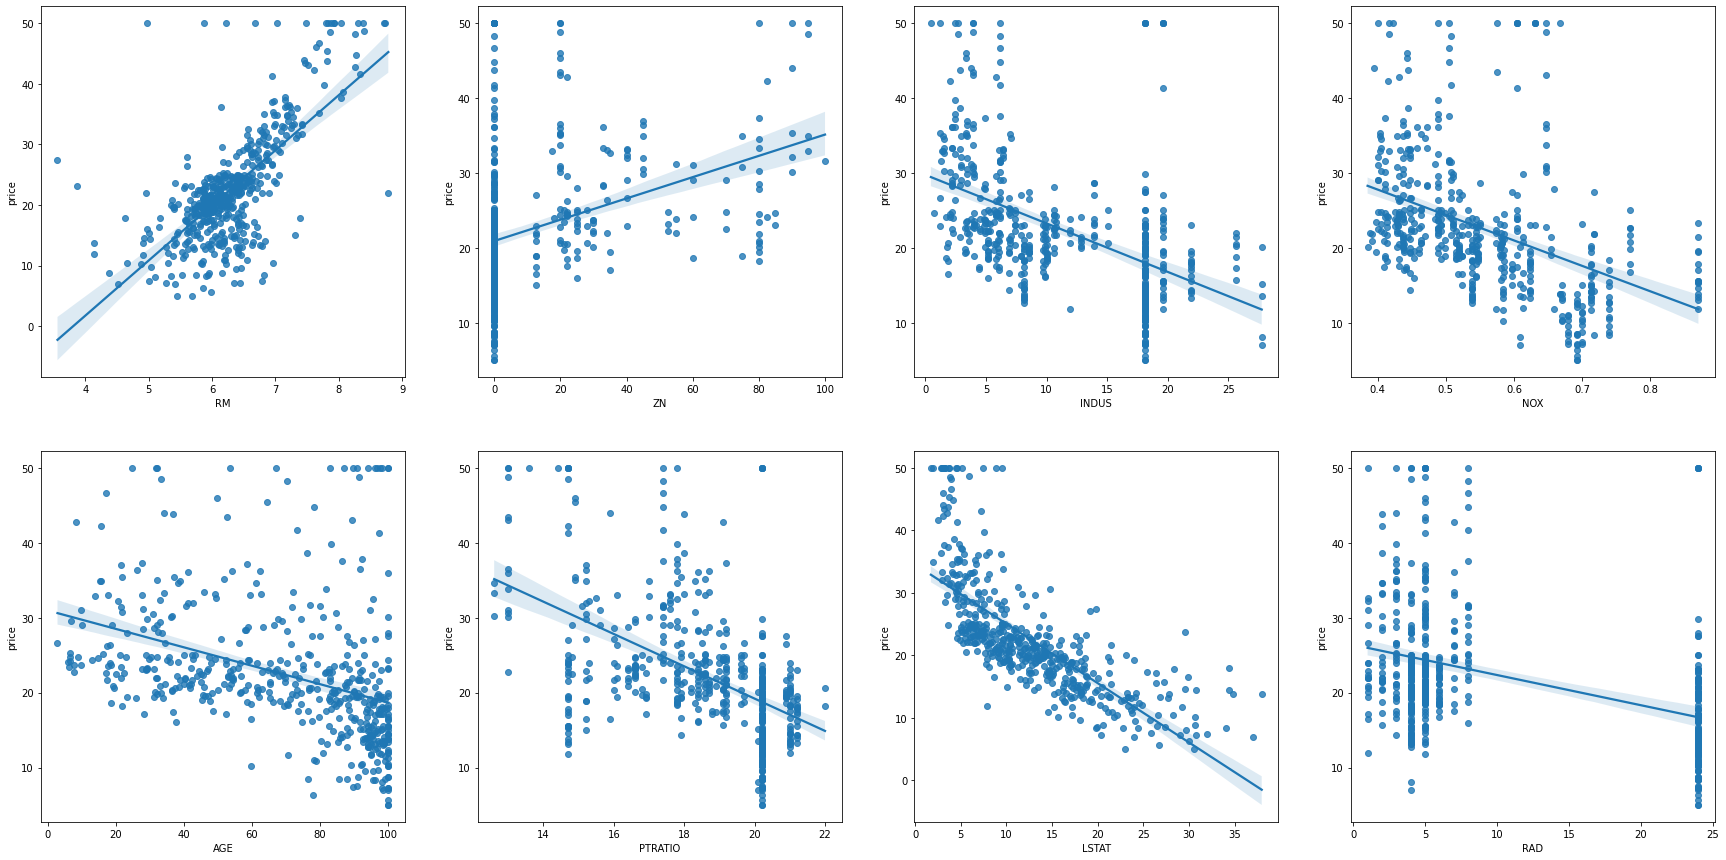

In [204]:
# 상관관계확인
import seaborn as sns
fig, axs = plt.subplots(figsize = (30, 15), ncols = 4, nrows = 2)
lm_features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']
for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    sns.regplot(x = feature, y = 'price', data = df, ax = axs[row][col])
    
    
# LSTAT

In [205]:
# test_target 분포
# for i in range(len(boston_target)):
#     plt.scatter(i,boston_target[i], s=60)

In [206]:
# 상관관계확인

df2 = df
df.corrwith(df2['price'])

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
price      1.000000
dtype: float64

In [207]:
# 'RM', 'LSTAT' 만으로 

In [208]:
# df3 = df.iloc[:,[5,-2]]
# df3.to_numpy()

# from sklearn.model_selection import train_test_split
# train_input, test_input, train_target, test_target = train_test_split(
# df3, boston_target, random_state = 42)

### 회귀

In [209]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_input, train_target)
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.748087259862344
0.684426728352713


In [274]:
a = lr.predict(test_input)
print(y_pred[1:10])

[35.97624698 15.09461832 25.22819748 18.85969393 23.20576882 17.6119987
 14.28847361 23.01060265 20.6222711 ]


In [275]:
# 예측 평균 및 오차
from sklearn import metrics
MSE = metrics.mean_squared_error(test_target, a)
RMSE = np.sqrt(metrics.mean_squared_error(test_target, a))
print('MSE:',MSE)
print('RMSE:',RMSE)

MSE: 22.098694827097997
RMSE: 4.700924890603763


Text(0, 0.5, 'pred')

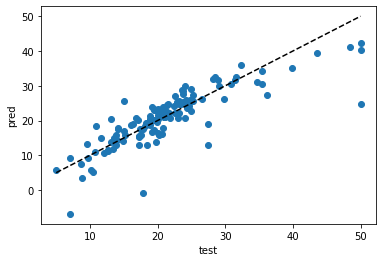

In [392]:
# 예측값과 테스트값으로 어느정도 일치할지 시각화

plt.scatter(test_target, y_pred)
plt.plot([test_target.min(),test_target.max()], [test_target.min(),test_target.max()], 'k--')
plt.xlabel('test')
plt.ylabel('pred')

### 다중회귀

In [129]:
from sklearn.model_selection import train_test_split

#raw = boston.data
#raw = df3

train_input, test_input, train_target, test_target = train_test_split(
raw, boston_target, random_state = 42)

- 다항식 변환기

In [326]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(include_bias = False) 
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

print(train_poly.shape)
print(train_target.shape)
print(test_poly.shape)
print(test_target.shape)

(379, 104)
(379,)
(127, 104)
(127,)


In [131]:
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9448313975211596
0.7758378394613858


### 리지회귀

In [359]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_input, train_target)

print('tiran score : ',ridge.score(train_input, train_target))
print('test score : ',ridge.score(test_input, test_target))

b1 = ridge.predict(test_input)

MSE = metrics.mean_squared_error(test_target, b1)
RMSE = np.sqrt(metrics.mean_squared_error(test_target, b1))
print('MSE:',MSE)
print('RMSE:',RMSE)

tiran score :  0.7480751530861578
test score :  0.6851470551775622
MSE: 22.048252397056245
RMSE: 4.695556665301383


- 최적 하이퍼파라미터 찾기

In [365]:
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alpha_list:
    ridge = Ridge(alpha = alpha)
    ridge.fit(train_poly, train_target)
    
train_score.append(ridge.score(train_poly, train_target))
test_score.append(ridge.score(test_poly, test_target))

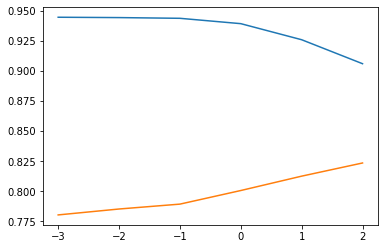

In [366]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.show()

In [379]:
ridge = Ridge(alpha =680)
ridge.fit(train_input, train_target)
print(ridge.score(train_input, train_target))
print(ridge.score(test_input, test_target))

b2 = ridge.predict(test_input)

MSE = metrics.mean_squared_error(test_target, b2)
RMSE = np.sqrt(metrics.mean_squared_error(test_target, b2))
print('MSE:',MSE)
print('RMSE:',RMSE)

0.5407864647348035
0.5450320788077294
MSE: 31.86010397542359
RMSE: 5.64447552704621


### 라쏘 회귀

In [348]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_input, train_target)
print(lasso.score(train_input, train_target))
print(lasso.score(test_input, test_target))

0.6762012555981395
0.6351852059637801


In [349]:
train_list = []
test_list = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list :
    lasso = Lasso(alpha = alpha)
    lasso.fit(train_scaled, train_target)
    

train_list.append(lasso.score(train_scaled, train_target))
test_list.append(lasso.score(test_scaled, test_target))

C:\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1119.637351519621, tolerance: 3.361037625329815
  model = cd_fast.enet_coordinate_descent(
C:\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 626.0834342539083, tolerance: 3.361037625329815
  model = cd_fast.enet_coordinate_descent(


C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Anaconda3\lib\site-pack

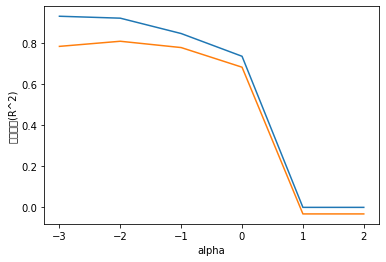

In [350]:
plt.plot(np.log10(alpha_list), train_list)
plt.plot(np.log10(alpha_list), test_list)
plt.xlabel('alpha')
plt.ylabel('결정계수(R^2)')
plt.show()

In [391]:
lasso = Lasso(alpha=-0)
lasso.fit(train_input, train_target)

print(lasso.score(train_input, train_target))
print(lasso.score(test_input, test_target))

c = ridge.predict(test_input)

MSE = metrics.mean_squared_error(test_target, c)
RMSE = np.sqrt(metrics.mean_squared_error(test_target, c))
print('MSE:',MSE)
print('RMSE:',RMSE)

0.748087259862344
0.6844267283527128
MSE: 31.86010397542359
RMSE: 5.64447552704621


C:\Users\userpc\AppData\Local\Temp/ipykernel_21184/2804072783.py:2: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso.fit(train_input, train_target)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4233.44098951297, tolerance: 3.361037625329815
  model = cd_fast.enet_coordinate_descent(
